<a href="https://colab.research.google.com/github/cgoeser1/MSDS422_course_assignments/blob/main/Titanic2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival**

# **Conduct EDA on the dataset as follows:**
* Conduct your analysis using a cross-validation design.
* Continue to improve upon your EDA.
* Build at least three models to classify survivors.
 - Random Forest Regressor
 - Gradient Boosted Trees 
 - Extra (Extremely Randomized) Trees
* Conduct hyperparameter tuning for the following at a minimum.
 - n_estimators (number of trees) -  
 - max_features (maximum features considered for splitting a node) -  
 - max_depth (maximum number of levels in each tree) 
* Compare your models using the Kaggle.com metric that is used for evaluation.
* Generate predictions from your models, and submit at least two models to Kaggle.com for evaluation. Provide your Kaggle.com user name and a screen snapshot.

Import all relevant packages.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
from scipy import stats

# to make this notebook's output stable across runs
np.random.seed(31)


# To plot pretty figures
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Clone the repository, so all files are in the same folder.  Should be accessible to all collaborators.

In [2]:
## These are just for working in Colab as cloned into GitHub
!git clone https://github.com/cgoeser1/MSDS422_course_assignments


Cloning into 'MSDS422_course_assignments'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 104 (delta 58), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 2.11 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (58/58), done.


Change the Colab working directory to that just cloned from GitHub.
Confirm the working directory.

In [3]:
## These are just for working in Colab as cloned into GitHub
os.chdir('/content/MSDS422_course_assignments')
os.getcwd()

'/content/MSDS422_course_assignments'


Load train and test files into Pandas dataframes.

In [4]:
## Get data from the provided CSV files.
train_url = 'https://gitcdn.link/repo/cgoeser1/MSDS422_course_assignments/main/train_titanic.csv'
train = pd.read_csv(train_url)
test_url = 'https://gitcdn.link/repo/cgoeser1/MSDS422_course_assignments/main/test_titanic.csv'
test = pd.read_csv(test_url)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Check the number of observations for each feature in the 'train' set.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

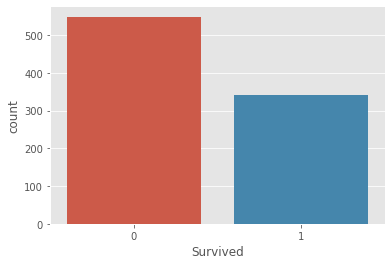

In [9]:
sns.countplot(x='Survived', data=train);

In [10]:
## quick look at percentage of male and females who survived:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f"% of women who survived: {rate_women*100:.2f}")
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f"% of men who survived: {rate_men*100:.2f}")
rate_all = sum(train["Survived"])/len(train["Survived"]) 
print(f"% of all who survived: {rate_all*100:.2f}")

% of women who survived: 74.20
% of men who survived: 18.89
% of all who survived: 38.38


In [11]:
print(f"Women_Survival\tMen_Survival\tAll_Survival")
print(f"{rate_women*100:.2f}%\t\t{rate_men*100:.2f}%\t\t{rate_all*100:.2f}%")

Women_Survival	Men_Survival	All_Survival
74.20%		18.89%		38.38%


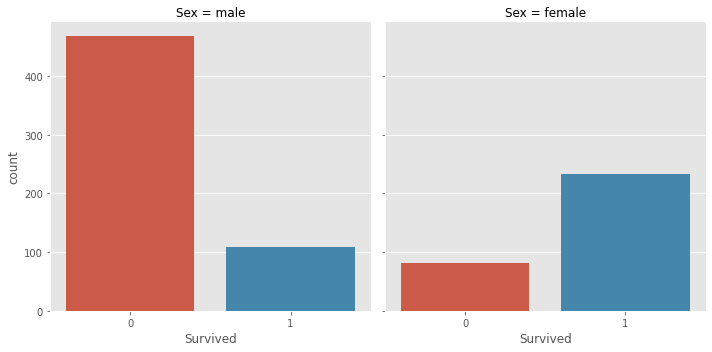

In [12]:
## look at the percentages visually
sns.catplot(x='Survived', col='Sex', kind='count', data=train);

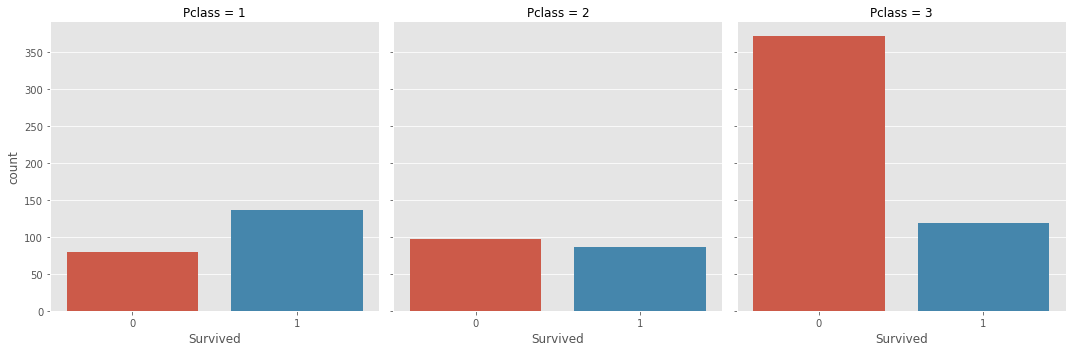

In [13]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=train);

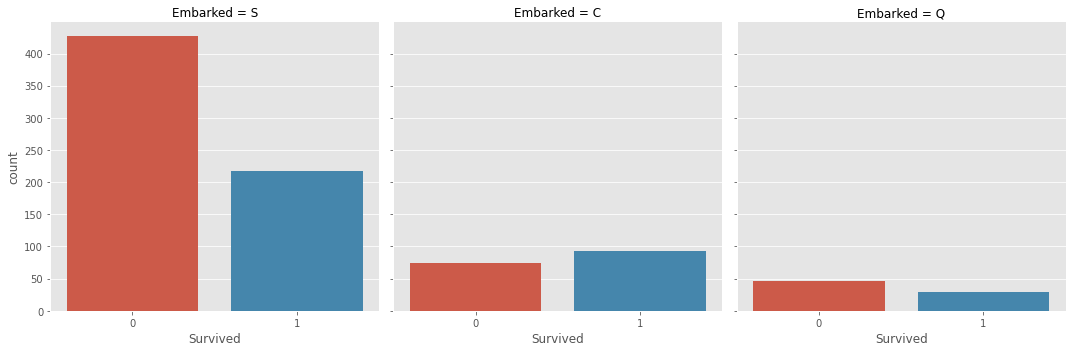

In [14]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train);

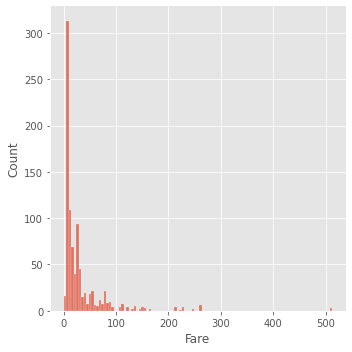

In [15]:
sns.displot(train.Fare, kde=False);

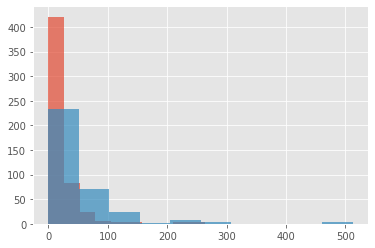

In [16]:
train.groupby('Survived').Fare.hist(alpha=0.7);

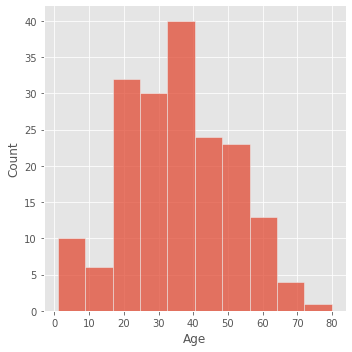

In [17]:
train_drop = train.dropna()
sns.displot(train_drop.Age, kde=False);

In [18]:
train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


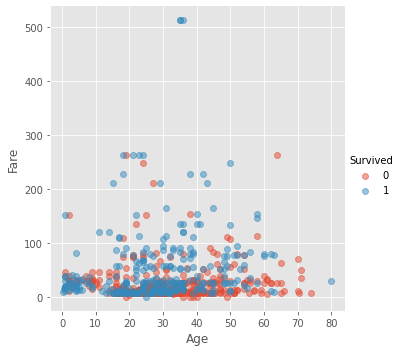

In [19]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train, fit_reg=False, scatter_kws={'alpha':0.5});

In [20]:
## sns.pairplot(train_drop, hue='Survived');

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

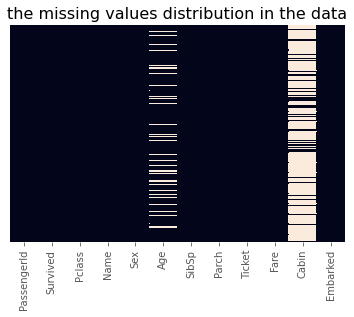

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

plt.title('the missing values distribution in the data',fontsize=16)
plt.show()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
## Impute missing numerical values
train['Age'] = train['Age'].fillna(train.Age.median())
## Impute Fare
train['Fare'] = train.Fare.fillna(train.Fare.median())
## Impute Embarked
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

# Impute Cabin
train['Cabin'] = train.Cabin.astype('str')
train['Cabin'] = train['Cabin'].fillna('no_cabin')
train['Cab-X'] = train.Cabin.str[0]
train = train.drop('Cabin',1)

# Check out info of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cab-X        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
## Impute missing numerical values
test['Age'] = test['Age'].fillna(test.Age.median())
## Impute Fare
test['Fare'] = test.Fare.fillna(test.Fare.median())
## Impute Embarked
test.Embarked.fillna(test.Embarked.mode()[0], inplace = True)

# Impute Cabin
test['Cabin'] = test.Cabin.astype('str')
test['Cabin'] = test['Cabin'].fillna('no_cabin')
test['Cab-X'] = test.Cabin.str[0]
test = test.drop('Cabin',1)

# Check out info of data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Cab-X        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [26]:
from collections import Counter
print(Counter(train['Embarked']))
print(Counter(test['Embarked']))

Counter({'S': 646, 'C': 168, 'Q': 77})
Counter({'S': 270, 'C': 102, 'Q': 46})


In [27]:
# Create column of number of Family members onboard
train['FamSize'] = train.Parch + train.SibSp
train = train.drop(['SibSp','Parch'], axis=1)
train.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Cab-X        891 non-null    object 
 10  FamSize      891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [28]:
# Create column of number of Family members onboard
test['FamSize'] = test.Parch + test.SibSp
test = test.drop(['SibSp','Parch'], axis=1)
test.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Cab-X        418 non-null    object 
 9   FamSize      418 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [29]:
train_needed = train.drop(['Name', 'PassengerId', 'Ticket'], axis = 1)
train_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Cab-X     891 non-null    object 
 7   FamSize   891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


There are only 680 unique ticket numbers.  This implies that family members were boarding under the same ticket number?  Also, there are only 240 cabins listed.  Did the remaining reside in some communal spaces?

In [30]:
len(train.Name.unique())

891

In [31]:
train_needed_dummies = pd.get_dummies(train_needed, drop_first= True)
train_needed_dummies.drop("Cab-X_T", axis=1, inplace=True)
train_needed_dummies.head()

,Survived,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Cab-X_B,Cab-X_C,Cab-X_D,Cab-X_E,Cab-X_F,Cab-X_G,Cab-X_n
0,0,3,22.0,7.2500,1,1,0,1,0,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,0,0,0,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1,0,1,0,0,0,0,0
4,0,3,35.0,8.0500,0,1,0,1,0,0,0,0,0,0,1


In [32]:
x_train_final = train_needed_dummies.drop('Survived', axis=1)
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   FamSize     891 non-null    int64  
 4   Sex_male    891 non-null    uint8  
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
 7   Cab-X_B     891 non-null    uint8  
 8   Cab-X_C     891 non-null    uint8  
 9   Cab-X_D     891 non-null    uint8  
 10  Cab-X_E     891 non-null    uint8  
 11  Cab-X_F     891 non-null    uint8  
 12  Cab-X_G     891 non-null    uint8  
 13  Cab-X_n     891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(10)
memory usage: 36.7 KB


In [33]:
y_train = train["Survived"]
sum(y_train)

342

In [34]:
# Now we try to find all the statistically significant variables for the model.
import statsmodels.api as sm

In [35]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

m=sm.add_constant(x_train_final)
model=sm.Logit(y_train,m)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.432523
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           14
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.3505
Time:                        17:37:37   Log-Likelihood:                -385.38
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 5.648e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1404      0.748      6.873      0.000       3.675       6.606
Pclass        -0.8830      0.179     -4.920      0.000      -1.235      -0.531
Age           -0.0408      0.008     -5.045      0.000      -0.057      -0.025
Fare           0.0025      0.003      0.955      0.340      -0.003       0.008
FamSize       -0.2268      0.069     -3.305      0.001      -0.361      -0.092
Sex_male      -2.7851      0.204    -13.631      0.000      -3.186      -2.385
Embarked_Q    -0.1446      0.385     -0.375      0.708      -0.900       0.611
Embarked_S    -0.4533      0.242     -1.870      0.062      -0.928       0.022
Cab-X_B        0.1674      0.700      0.239      0.811      -1.205       1.540
Cab-X_C       -0.3981      0.647     -0.615      0.538      -1.666       0.870
Cab-X_D        0.6649      0.723      0.920      0.358      -0.752       2.082
Cab-X_E        1.1387      0.723      1.576      0.115      -0.278       2.555
Cab-X_F        0.9181      0.918      1.000      0.317      -0.882       2.718
Cab-X_G       -1.0729      1.232     -0.871      0.384      -3.487       1.341
Cab-X_n       -0.4230      0.609     -0.694      0.487      -1.617       0.771
==============================================================================
"""

In [36]:
#Since the variables with p value > 0.005 are not statistically significant we will drop them one by one 

# Drop Embarked since its P value > 0.005
x_train1 = x_train_final.drop(['Embarked_Q', 'Embarked_S'], axis= 1)

In [37]:
m=sm.add_constant(x_train1)
model=sm.Logit(y_train,m)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.434746
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.3471
Time:                        17:37:37   Log-Likelihood:                -387.36
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.121e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8646      0.734      6.627      0.000       3.426       6.303
Pclass        -0.8595      0.175     -4.924      0.000      -1.202      -0.517
Age           -0.0413      0.008     -5.119      0.000      -0.057      -0.025
Fare           0.0033      0.003      1.265      0.206      -0.002       0.008
FamSize       -0.2463      0.068     -3.634      0.000      -0.379      -0.113
Sex_male      -2.8122      0.202    -13.908      0.000      -3.208      -2.416
Cab-X_B        0.1469      0.705      0.208      0.835      -1.236       1.530
Cab-X_C       -0.4533      0.650     -0.697      0.486      -1.728       0.821
Cab-X_D        0.6259      0.727      0.861      0.389      -0.798       2.050
Cab-X_E        0.9815      0.720      1.363      0.173      -0.430       2.393
Cab-X_F        0.7835      0.917      0.854      0.393      -1.014       2.581
Cab-X_G       -1.2908      1.229     -1.050      0.294      -3.700       1.119
Cab-X_n       -0.5247      0.612     -0.858      0.391      -1.723       0.674
==============================================================================
"""

In [38]:
# Drop Deck since its P value > 0.005
x_train2 = x_train1.drop(['Cab-X_B', 'Cab-X_C', 'Cab-X_D', 'Cab-X_E', 'Cab-X_F', 'Cab-X_G', 'Cab-X_n'], axis= 1)

In [39]:
m=sm.add_constant(x_train2)
model=sm.Logit(y_train,m)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.443885
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.3334
Time:                        17:37:37   Log-Likelihood:                -395.50
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.566e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9113      0.530      9.266      0.000       3.873       5.950
Pclass        -1.0808      0.139     -7.763      0.000      -1.354      -0.808
Age           -0.0387      0.008     -4.973      0.000      -0.054      -0.023
Fare           0.0030      0.002      1.286      0.199      -0.002       0.008
FamSize       -0.2396      0.067     -3.568      0.000      -0.371      -0.108
Sex_male      -2.7770      0.198    -14.022      0.000      -3.165      -2.389
==============================================================================
"""

In [40]:
# Drop Fare since its P value > 0.005
x_train_final = x_train2.drop('Fare', axis= 1)

In [41]:
m=sm.add_constant(x_train_final)
model=sm.Logit(y_train,m)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.444911
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.3319
Time:                        17:37:37   Log-Likelihood:                -396.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.007e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2099      0.481     10.842      0.000       4.268       6.152
Pclass        -1.1751      0.120     -9.801      0.000      -1.410      -0.940
Age           -0.0391      0.008     -5.039      0.000      -0.054      -0.024
FamSize       -0.2155      0.064     -3.358      0.001      -0.341      -0.090
Sex_male      -2.7834      0.198    -14.081      0.000      -3.171      -2.396
==============================================================================
"""

We found all the significant variables

# **Test Set prep**


In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Cab-X,FamSize
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,n,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,n,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,n,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,n,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,n,2


In [43]:
test_needed = test.drop(['Name', 'PassengerId', 'Ticket'], axis = 1)
test_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
 5   Cab-X     418 non-null    object 
 6   FamSize   418 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 23.0+ KB


In [44]:
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   FamSize   891 non-null    int64  
 3   Sex_male  891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 21.9 KB


In [45]:
test_final = pd.get_dummies(test_needed, drop_first= True)
test_final.head() 

,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Cab-X_B,Cab-X_C,Cab-X_D,Cab-X_E,Cab-X_F,Cab-X_G,Cab-X_n
0,3,34.5,7.8292,0,1,1,0,0,0,0,0,0,0,1
1,3,47.0,7.0000,1,0,0,1,0,0,0,0,0,0,1
2,2,62.0,9.6875,0,1,1,0,0,0,0,0,0,0,1
3,3,27.0,8.6625,0,1,0,1,0,0,0,0,0,0,1
4,3,22.0,12.2875,2,0,0,1,0,0,0,0,0,0,1


In [46]:
test_needed_final = test_final[['Pclass','Age','FamSize','Sex_male']]
test_needed_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   FamSize   418 non-null    int64  
 3   Sex_male  418 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 10.3 KB


# **Creating the Logistic Regression Model**

In [47]:
from sklearn.linear_model import LogisticRegression
logisReg = LogisticRegression(C=5)
logisReg.fit(x_train_final, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Cross Validation

C=1.0
 - array([0.79329609, 0.78089888, 0.79775281, 0.78089888, 0.80337079])

In [48]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(logisReg, x_train_final, y_train, scoring="accuracy", cv=5)
scores_log.mean()

0.7901198920343984

The accuracy of cross-validation mean score is 0.799 or ~80%

# Confusion Matrix
To create the confusion matrix we need a set of predictions to compare with the actual outcome. We will use the function
cross_val_predict since we did not split the trai set. This function use the train data to do a k fold cross validation and returns the predictions. 

In [49]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logisReg, x_train_final , y_train,  cv=5)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[465,  84],
       [103, 239]])

In [51]:
sum(y_train)
print(f"Total survived is {sum(y_train)}")
print(f"FN {cm[1,0]} = those who survived by were predicted.")
print(f"TP {cm[1,1]} those who survive and correctly predicted.")

Total survived is 342
FN 103 = those who survived by were predicted.
TP 239 those who survive and correctly predicted.



             PREDICTIONS
             P0        P1
     Act0 |  TN   |    FP  
     Act1 |  FN   |    TP
Scikit learn sorts labels in ascending order, thus 0's are first column/row\
and 1's are the second one.

From the matrix above we can see that :\
TPR(recall) = TP/TP+FN = 234/(234+108) = 0.684 \
FPR = FP/FP+TN = 80/(80+469) = 0.14257

In [52]:
tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1]) ## TP / TP+FN
print(f"TPR (Recall) = {tpr}")

precision = cm[0, 0] / (cm[0, 0] + cm[0, 1]) ## TP / TP+FP
print(f"Precision = {precision}")



TPR (Recall) = 0.6988304093567251
Precision = 0.8469945355191257


In [53]:
from sklearn.metrics import precision_score, recall_score
# Find the (TPR) Recall 
recall_score(y_train, y_train_pred)

0.6988304093567251

In [54]:
# Find the precision
precision_score(y_train, y_train_pred)

0.739938080495356

In [55]:
specificity = cm[1, 1] / (cm[0,1] + cm[1, 1])
print(f"Specificity = {specificity}")
fpr = 1-specificity
print(f"FPR = {fpr}")

Specificity = 0.739938080495356
FPR = 0.26006191950464397


# Precision-Recall Graph

In [56]:
y_scores = cross_val_predict(logisReg, x_train_final, y_train, cv=5, method="decision_function")
y_scores[0:10]

array([-2.18586124,  2.33957262,  0.47983908,  2.45224117, -2.5004999 ,
       -2.23760662, -0.73006792, -1.95551273,  0.09509945,  1.99892129])

In [57]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [58]:
print(precisions[0:2], recalls[0:2], thresholds[0:2])

[0.39721254 0.39651163] [1.         0.99707602] [-2.9020154  -2.89941547]


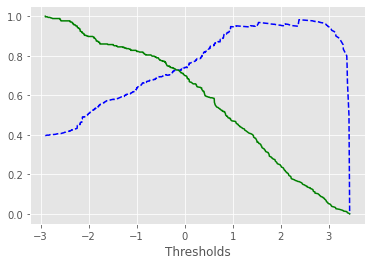

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Thresholds")


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0.5, 0, 'recall')

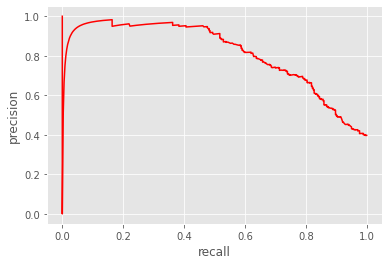

In [60]:
plt.plot(recalls, precisions, "r-")
plt.ylabel("precision")
plt.xlabel("recall")

In [61]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

0.8178447286387875

In [62]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train, y_train_pred_90)

0.9030612244897959

In [63]:
recall_90_precision= recall_score(y_train, y_train_pred_90)

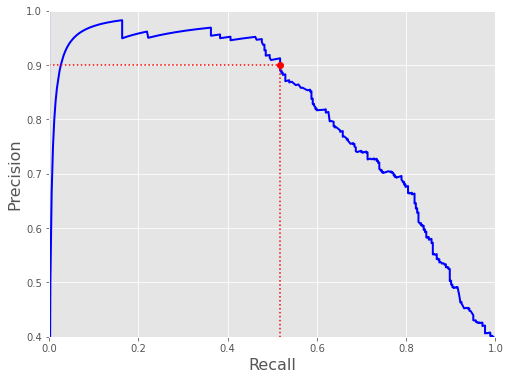

In [64]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0.0, 1, 0.4, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

# ROC Curve

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

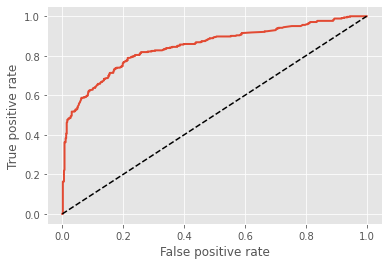

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

plot_roc_curve(fpr, tpr)
plt.show()

In [67]:
# area under thr ROC curve score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8464033489917873

# Get LogisReg Predictions

In [68]:
y_scores = logisReg.predict(test_needed_final)
len(y_scores)

418

In [69]:
# Create a data frame with the passengerid and prediction for submission.
ID = test['PassengerId']
logis_sub = pd.DataFrame(ID, columns=['PassengerId'])
logis_sub['Survived'] = y_scores
logis_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [70]:
# Export dataframe with the passengerid and prediction for submission.
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"logis_predict_{date}.csv")
logis_sub.to_csv(filename, index=False)

# **KNN model**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(x_train_final,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [72]:
from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(knn_cls, x_train_final, y_train, scoring="accuracy", cv=5)
scores_knn

array([0.77653631, 0.78089888, 0.7752809 , 0.75280899, 0.79775281])

In [73]:
# the mean of the cross validation scores
mean_scores_knn = scores_knn.mean()
mean_scores_knn

0.776655577176574

## Confusion Matrix
To create the confusion matrix we need a set of predictions to compare with the actual outcome. We will use the function
cross_val_predict since we did not split the trai set. This function use the train data to do a k fold cross validation and returns the predictions. 

In [74]:
y_train_knnPred = cross_val_predict(knn_cls, x_train_final, y_train, cv=3)

In [75]:
confusion_matrix(y_train, y_train_knnPred)

array([[467,  82],
       [123, 219]])

In [76]:
# Find the Recall 
recall_score(y_train, y_train_knnPred) 

0.6403508771929824

In [77]:
# Find the precision
precision_score(y_train, y_train_knnPred)

0.7275747508305648

In [78]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(logisReg, x_train_final, y_train, scoring="accuracy", cv=5)
scores_log

array([0.79329609, 0.78089888, 0.79775281, 0.78089888, 0.79775281])

In [79]:
# the mean of the cross validation scores
m_scores = scores_log.mean()
m_scores

0.7901198920343984

In [80]:
knn_pred = knn_cls.predict(test_needed_final)
len(knn_pred)

418

In [81]:
# Create a data frame with the passengerid and prediction for submission.
ID = test['PassengerId']
knn_sub = pd.DataFrame(ID, columns=['PassengerId'])
knn_sub['Survived'] = knn_pred
knn_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [82]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"knn_predict_{date}.csv")
knn_sub.to_csv(filename, index=False)

# **QDA (Quadratic Discriminant Analysis)**

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [84]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(x_train_final, y_train)
print(model2.priors_)
print(model2.means_)

[0.61616162 0.38383838]
[[ 2.53187614 30.02823315  0.88342441  0.85245902]
 [ 1.9502924  28.29143275  0.93859649  0.31871345]]


In [85]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(qda, x_train_final, y_train, scoring="accuracy", cv=5)
scores_log.mean()

0.8069487163392128

In [86]:
qda_results=model2.predict(test_needed_final)


In [87]:
# Create a data frame with the passengerid and prediction for submission.
ID = test['PassengerId']
qda_pred = pd.DataFrame(ID, columns=['PassengerId'])
qda_pred['Survived'] = qda_results
qda_pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"qda_predict_{date}.csv")
qda_pred.to_csv(filename, index=False)

# **SVC (Support Vector Classification)**

In [89]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(x_train_final, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(svm_clf, x_train_final, y_train, scoring="accuracy", cv=5)
scores_log.mean()

0.8036281463812692

In [91]:
y_pred = svm_clf.predict(test_needed_final)

In [92]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
svc_results = pd.DataFrame(ID, columns= ['PassengerId'])
svc_results['Survived'] = y_pred
svc_results.shape

(418, 2)

In [93]:
svc_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [94]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"svc_predict_{date}.csv")
svc_results.to_csv(filename, index=False)

# **Decision Tree Classifier**

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
type(tree_clf)

sklearn.tree._classes.DecisionTreeClassifier

In [96]:
tree_clf.fit(x_train_final, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [97]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(tree_clf, x_train_final, y_train, scoring="accuracy", cv=5)
print(scores_log.mean(), scores_log)

0.773316176009039 [0.74860335 0.79213483 0.78651685 0.75280899 0.78651685]


In [98]:
tree_pred_prob = tree_clf.predict_proba(test_needed_final)
len(tree_pred_prob)

418

In [99]:
## Make predictions and export for Kaggle.
y_pred = tree_clf.predict(test_needed_final)

ID = test['PassengerId']
# Create a dataframe for results to be submitted 
tree_results = pd.DataFrame(ID, columns= ['PassengerId'])
tree_results['Survived'] = y_pred
tree_results.shape

from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"tree_predict_{date}.csv")
tree_results.to_csv(filename, index=False)

# Tried generating tree graphics, similar to the book.  Not really sure how to generate the .dot file.  Will look into it later. -cpg

In [100]:
## Had to ADD graphviz to python environment before it could be used here. -cpg
from graphviz import Source
## THIS step required to get -cpg
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
##from sklearn.tree import export_graphviz
##export_graphviz(tree_clf, out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"), feature_names=iris.feature_names[2:], \
  ##      class_names=iris.target_names, rounded=True, filled=True)
##Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# **Random Forest Decision Tree**

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=3, random_state=42)
rf_clf.fit(x_train_final, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [102]:
##y_train_rForPred = cross_val_predict(clf, x_train_final, y_train, cv=5)
##confusion_matrix(y_train, y_pred)
# Find the Recall 
##recall_score(y_train, y_train_knnPred) 
# Find the precision
##precision_score(y_train, y_train_knnPred)

In [103]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(rf_clf, x_train_final, y_train, scoring="accuracy", cv=5)
scores_log.mean()


0.8271420500910176

In [104]:
y_pred = rf_clf.predict(test_needed_final)


In [105]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
rand_for_results = pd.DataFrame(ID, columns= ['PassengerId'])
rand_for_results['Survived'] = y_pred
rand_for_results.shape

(418, 2)

In [106]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"rand_for_predict_{date}.csv")
rand_for_results.to_csv(filename, index=False)

# **Random Forest Classifier (redux)**

In [107]:
import matplotlib as mpl
rnd_clf = RandomForestClassifier( random_state=42) #n_estimators=100,
rnd_clf.fit(x_train_final, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [108]:
def plot_digit(data):
    image = data.reshape(2,2)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

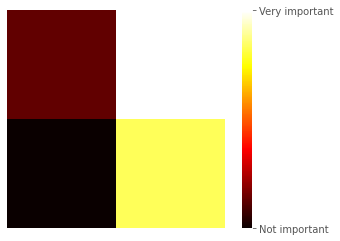

In [109]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

##save_fig("mnist_feature_importance_plot")
plt.show()

# **AdaBoosted**

In [110]:
print("\nTotal number who surived (per training set): ", +y_train.sum())


Total number who surived (per training set):  342


In [111]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train_final, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [112]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(ada_clf, x_train_final , y_train,  cv=50)

# Ada confusion matrix

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[473,  76],
       [ 89, 253]])

In [114]:
sum(y_train)
print(f"Total survived is {sum(y_train)}")
print(f"FN {cm[1,0]} = those who survived but were NOT predicted.")
print(f"TP {cm[1,1]} = those who survive and were correctly predicted.")

Total survived is 342
FN 89 = those who survived but were NOT predicted.
TP 253 = those who survive and were correctly predicted.


In [115]:
tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1]) ## TP / TP+FN
print(f"TPR (Recall) = {tpr}")

precision = cm[0, 0] / (cm[0, 0] + cm[0, 1]) ## TP / TP+FP
print(f"Precision = {precision}")

TPR (Recall) = 0.7397660818713451
Precision = 0.8615664845173042


In [116]:
from sklearn.metrics import precision_score, recall_score
# Find the (TPR) Recall 
recall_score(y_train, y_train_pred)

0.7397660818713451

In [117]:
from sklearn.model_selection import cross_val_score
scores_ada = cross_val_score(ada_clf, x_train_final, y_train, scoring="accuracy", cv=5)
scores_ada.mean()

0.809189630280585

In [118]:
ada_results = ada_clf.predict(test_needed_final)
len(ada_results)

418

In [119]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
ada_results = pd.DataFrame(ID, columns= ['PassengerId'])
ada_results['Survived'] = y_pred
ada_results.shape

(418, 2)

In [120]:
sum(ada_results["Survived"])

151

In [121]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"ada_boost_predict_{date}.csv")
ada_results.to_csv(filename, index=False)

# **Gradient Boosted - 3rd try (SUCCESS -cpg).**

In [122]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_val, y_train2, y_val = train_test_split(x_train_final, y_train, random_state=49)

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train2)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=65,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [127]:
print("Number of estimators:", gbrt_best.n_estimators)
##print("Minimum validation MSE:", min_val_error)

Number of estimators: 65


In [128]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gbrt_best, x_train_final , y_train,  cv=5)

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[497,  52],
       [ 96, 246]])

In [131]:
sum(y_train)
print(f"Total survived is {sum(y_train)}")
print(f"FN {cm[1,0]} = those who survived but were NOT predicted.")
print(f"TP {cm[1,1]} = those who survive and were correctly predicted.")

Total survived is 342
FN 96 = those who survived but were NOT predicted.
TP 246 = those who survive and were correctly predicted.


In [132]:
tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1]) ## TP / TP+FN
print(f"TPR (Recall) = {tpr}")

precision = cm[0, 0] / (cm[0, 0] + cm[0, 1]) ## TP / TP+FP
print(f"Precision = {precision}")

TPR (Recall) = 0.7192982456140351
Precision = 0.9052823315118397


In [133]:
from sklearn.metrics import precision_score, recall_score
# Find the (TPR) Recall 
recall_score(y_train, y_train_pred)

0.7192982456140351

In [134]:
from sklearn.model_selection import cross_val_score
scores_gbrt_best = cross_val_score(gbrt_best, x_train_final, y_train, scoring="accuracy", cv=5)
scores_gbrt_best.mean()

0.8338836231247253

In [135]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
gbrt_best_results = pd.DataFrame(ID, columns= ['PassengerId'])
gbrt_best_results['Survived'] = y_pred
gbrt_best_results.shape

(418, 2)

In [136]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"gbrt_best_predict_{date}.csv")
gbrt_best_results.to_csv(filename, index=False)

In [137]:
print("Number of estimators:", gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

Number of estimators: 1
Minimum validation MSE: inf


In [138]:
y_pred = gbrt_best.predict(test_needed_final)
len(y_pred)

418

In [139]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
gboost_results = pd.DataFrame(ID, columns= ['PassengerId'])
gboost_results['Survived'] = y_pred
gboost_results.shape

(418, 2)

In [140]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"gboost_predict_{date}.csv")
gboost_results.to_csv(filename, index=False)

# **Extra (Extremely Randomized) Trees**

In [142]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_val, y_train2, y_val = train_test_split(x_train_final, y_train, random_state=49)
## checking that we didn't alter the original data.
print(len(x_train_final), len(y_train))
print(len(X_train), len(X_val), len(y_train2), len(y_val))

891 891
668 223 668 223


In [143]:
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [144]:
extra_trees_clf.fit(x_train_final, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [145]:
[extra_trees_clf.score(X_val, y_val)]

[0.9461883408071748]

In [146]:
y_pred = extra_trees_clf.predict(test_needed_final)

In [147]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
xtra_results = pd.DataFrame(ID, columns= ['PassengerId'])
xtra_results['Survived'] = y_pred
print(xtra_results.shape)

from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"xtra_predict{date}.csv")
xtra_results.to_csv(filename, index=False)

(418, 2)


# **Voting with Extra (Extremely Randomized) Trees, etc.**

In [148]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [149]:
X_train, X_val, y_train2, y_val = train_test_split(x_train_final, y_train, random_state=49)

In [150]:
print(len(x_train_final), len(y_train))
print(len(X_train), len(X_val), len(y_train2), len(y_val))

891 891
668 223 668 223


In [151]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [152]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(x_train_final, y_train)

Training the RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                 

In [153]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9417040358744395,
 0.9461883408071748,
 0.34080717488789236,
 0.8430493273542601]

In [154]:
from sklearn.ensemble import VotingClassifier

In [155]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [156]:
voting_clf = VotingClassifier(named_estimators)

In [157]:
voting_clf.fit(X_train, y_train2)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_lea

In [158]:
voting_clf.score(X_val, y_val)

0.8475336322869955

In [159]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.8430493273542601,
 0.8385650224215246,
 0.33183856502242154,
 0.820627802690583]

In [160]:
voting_clf.set_params(svm_clf=None)
del voting_clf.estimators_[2]

In [161]:
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs

In [162]:
voting_clf.score(X_val, y_val)

0.8475336322869955

In [163]:
voting_clf.voting = "soft"
voting_clf.score(X_val, y_val)
## 'Soft' is worse!!  

0.8340807174887892

In [164]:
voting_clf.voting = "hard"
voting_clf.score(X_val, y_val)

0.8475336322869955

In [165]:
 y_pred = voting_clf.predict(test_needed_final)

In [166]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
voting_results = pd.DataFrame(ID, columns= ['PassengerId'])
voting_results['Survived'] = y_pred
print(voting_results.shape)
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"voting_predict{date}.csv")
voting_results.to_csv(filename, index=False)

(418, 2)


# **Decision Tree Classifier (via GridSearchCV)**

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train2, y_test = train_test_split(x_train_final, y_train, test_size=0.2, random_state=42)

In [168]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)

grid_search_cv.fit(X_train, y_train2)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [169]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [170]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8044692737430168

In [171]:
y_pred = grid_search_cv.predict(test_needed_final)

In [172]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
tree_results = pd.DataFrame(ID, columns= ['PassengerId'])
tree_results['Survived'] = y_pred
tree_results.shape

from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"tree_predict_{date}.csv")
tree_results.to_csv(filename, index=False)

(418, 2)